# Work with scikit-learn

Our code can work with the famous package `sklearn` easily, and here is an example.

In [1]:
from abess.linear import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, make_scorer, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

- Establish the process

Suppose we would like to extend the original variables to their interactions, and then do `LogisticRegression` on them. This can be record with `Pipeline`:

In [2]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),   # without intercept
    ('alogistic', LogisticRegression())
])

- Parameter grid

We can give different parameters to model and let the program choose the best. Here we should give parameters for `PolynomialFeatures`, for example:

In [3]:
param_grid = {
    'poly__interaction_only': [True, False],    # whether the "self-combination" (e.g. X^2, X^3) exists
    'poly__degree': [1, 2, 3]                   # the degree of polynomial
}

Note that the program would try ALL combinations of what we give, which means that there are $2\times3=6$ combinations of parameters will be tried.

- Criterion

After giving a grid of parameters, we should define what is a "better" result. For example, the AUR (area under ROC curve) can be a criterion and the larger, the better.

In [4]:
scorer = make_scorer(roc_auc_score, greater_is_better = True)

- Cross Validation

For more accurate results, cross validation is often formed. In this example, we use 5-fold CV for parameters searching: 

In [5]:
grid_search = GridSearchCV(pipe, param_grid, scoring = scorer, cv = 5)

- Model fitting

Eveything is prepared now. We can simply load the data and put it into `grid_search`: 

In [6]:
X, y = load_breast_cancer(return_X_y = True)
grid_search.fit(X, y)
print([grid_search.best_score_, grid_search.best_params_])

[0.9663829492654472, {'poly__degree': 2, 'poly__interaction_only': True}]


The best choice of parameter combination is shown above: 2 degree with "self-combination". Here is its ROC curve:

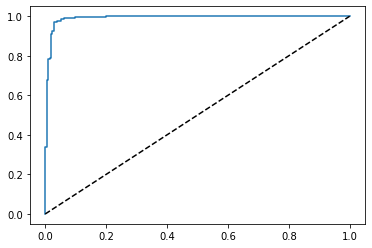

In [7]:
proba = grid_search.predict_proba(X)
fpr, tpr, _ = roc_curve(y, proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()